## GQA Question Engine

In [1]:
!pip install networkx matplotlib

In [17]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def load_scene_graph(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Path to scene graph JSON file
scene_graph_file = 'sceneGraphs/train_sceneGraphs.json'

scene_graph_data = load_scene_graph(scene_graph_file)

{
    "2078282": {
        "attributes": [
            "red"
        ],
        "h": 10,
        "name": "leaves",
        "relations": [
            {
                "name": "on",
                "object": "2078283"
            },
            {
                "name": "to the right of",
                "object": "2935502"
            },
            {
                "name": "to the left of",
                "object": "2308367"
            }
        ],
        "w": 8,
        "x": 84,
        "y": 370
    },
    "2078283": {
        "attributes": [],
        "h": 184,
        "name": "sidewalk",
        "relations": [
            {
                "name": "to the left of",
                "object": "2881921"
            }
        ],
        "w": 252,
        "x": 33,
        "y": 316
    },
    "2082777": {
        "attributes": [
            "black",
            "iron"
        ],
        "h": 170,
        "name": "post",
        "relations": [
            {
                "name": "t

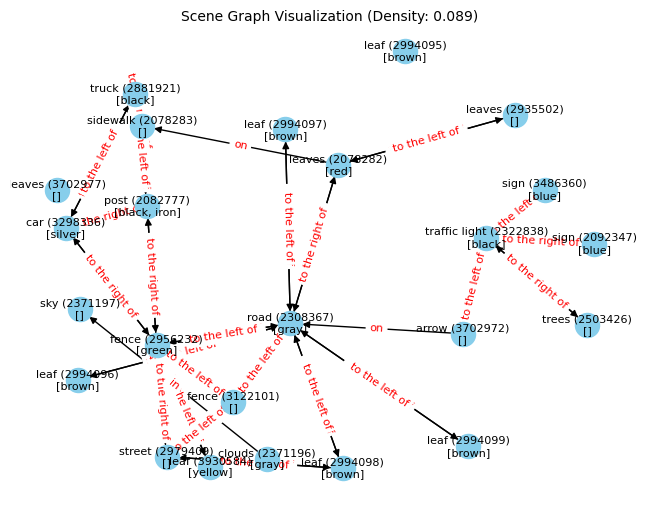

In [39]:
# Example image ID
image_id = "2338159"

if image_id in scene_graph_data:
    image_data = scene_graph_data[image_id]["objects"]
else:
    raise ValueError(f"Image ID {image_id} not found in the scene graph data")

print(json.dumps(image_data, sort_keys=True, indent=4))

# Create a graph
G = nx.DiGraph()

for obj_id, obj_data in image_data.items():
    obj_name = f'{obj_data["name"]} ({obj_id})'
    attributes = ', '.join(obj_data["attributes"]) if "attributes" in obj_data else ""
    label = f'{obj_name}\n[{attributes}]'
    
    # Add object node with attributes
    G.add_node(obj_id, label=label)
    
    # Add edges for relationships
    if "relations" in obj_data:
        for relation in obj_data["relations"]:
            target_obj = relation["object"]
            relation_name = relation["name"]
            G.add_edge(obj_id, target_obj, label=relation_name)

# Get graph density and node count to adjust layout and size
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
graph_density = nx.density(G)  # Density: edges / possible edges

# Dynamic scaling based on the number of nodes and edges
scale_factor = max(1, num_nodes / 30)  # Adjust based on node count
node_size = max(200, 300 / scale_factor)  # Dynamic node size
font_size = max(5, 8 / scale_factor)     # Dynamic font size
k_value = max(0.5, 1 / scale_factor)    # Dynamic spacing between nodes

# Define position layout (spring_layout) with dynamic k based on density
pos = nx.spring_layout(G, k=k_value)

# Draw nodes with dynamic size and labels with dynamic font size
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), 
        node_size=node_size, node_color='skyblue', font_size=font_size, font_weight='light')

# Draw edges with smaller labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=font_size)

# Display the plot with adjusted title size
plt.title(f"Scene Graph Visualization (Density: {graph_density:.3f})", fontsize=10)
plt.show()
